## Xception Pretrained Model 


In [1]:
import tensorflow as tf
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications.xception import preprocess_input,  decode_predictions
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!pip  install matplotlib


Looking in indexes: https://pypi.org/simple/



[notice] A new release of pip available: 22.2.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
model = Xception(weights= 'imagenet')

In [4]:
model.summary()

Model: "xception"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 299, 299,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1        │ (None, 149, 149,  │        864 │ input_layer[0][0] │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_bn     │ (None, 149, 149,  │        128 │ block1_conv1[0][… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_act    │ (None, 149, 149,  │          0 │ block1_conv1_bn[… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2        │ (None, 147, 147,  │     18,432 │ block1_conv1_act… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_bn     │ (None, 147, 147,  │        256 │ block1_conv2[0][… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_act    │ (None, 147, 147,  │          0 │ block1_conv2_bn[… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1     │ (None, 147, 147,  │      8,768 │ block1_conv2_act… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1_bn  │ (None, 147, 147,  │        512 │ block2_sepconv1[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_act │ (None, 147, 147,  │          0 │ block2_sepconv1_… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2     │ (None, 147, 147,  │     17,536 │ block2_sepconv2_… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_bn  │ (None, 147, 147,  │        512 │ block2_sepconv2[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 74, 74,    │      8,192 │ block1_conv2_act… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_pool         │ (None, 74, 74,    │          0 │ block2_sepconv2_… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 74, 74,    │        512 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 74, 74,    │          0 │ block2_pool[0][0… │
│                     │ 128)              │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_sepconv1_act │ (None, 74, 74,    │          0 │ add[0][0]       

 Total params: 22,910,480 (87.40 MB)

 Trainable params: 22,855,952 (87.19 MB)

 Non-trainable params: 54,528 (213.00 KB)

img to be loaded is 299 X 299 


In [5]:
def predict(model , img ):
    img = load_img( img_path , target_size=(299 , 299))
    img_arr = img_to_array(img)
    img_arr = np.expand_dims(img_arr , axis= 0)
    img_arr = preprocess_input(img_arr)

    preds = model.predict(img_arr)

    return decode_predictions(preds , top = 3)[0]



In [6]:
from turtle import reset
from unittest import expectedFailure
from urllib import request, response
import requests 
def download_img(url):
    try:
        response = requests.get(url , stream= True)
        response.raise_for_status()
        with open(file_name , 'wb') as out_file:
            for chunk in response.iter_content(chunk_size = 8192):
                out_file.write(chunk)
        print(f"Image Downloaded Successfully to {save_path}")
    except request.exceptions.HTTPError as err: 
        print(f"Error downloadding hte image {err}")

        

In [10]:
from logging import StreamHandler
from tkinter.tix import Tree


def download_img_khud_se(url , save_path):
    try:
        response = requests.get(url , stream= True)
        response.raise_for_status()
        with open(save_path , 'wb') as out_file:
            for chunk in response.iter_content(chunk_size= 8192):
                out_file.write(chunk)
        print(f"image downloaded successfullly to { save_path}")
    except requests.exceptions.HTTPError as e:
        print(f"Error downloading image: {e}")

        

In [11]:
download_img_khud_se("https://cdn.mos.cms.futurecdn.net/HjFE8NKWuCmgfHCcndJ3rK.jpg", "zebra.jpg")

image downloaded successfullly to zebra.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 3us/step
Top Predictions:
zebra : 0.9225
hartebeest : 0.0021
ostrich : 0.0009


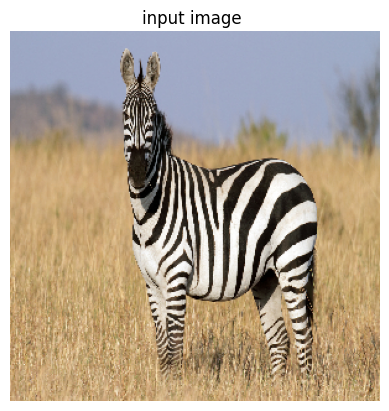

In [12]:
img_path = './zebra.jpg'
predictions = predict(model , img_path)
# display 

print("Top Predictions:")
for class_id , descrition , score in predictions :
    print(f"{descrition} : {score:.4f}")


# display the iamge 

plt.imshow(load_img(img_path , target_size= (299 , 299)))
plt.axis('off')
plt.title('input image ')
plt.show()